In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

In [3]:
# Load dataset
df = pd.read_csv("/content/Iris.csv")
df.drop(columns=['Id'], inplace=True)

In [4]:
# Features and target
X = df.drop(columns=['Species'])
y = df['Species']

In [5]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)


In [7]:
# Try different values of K
k_range = range(1, 21)
accuracies = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

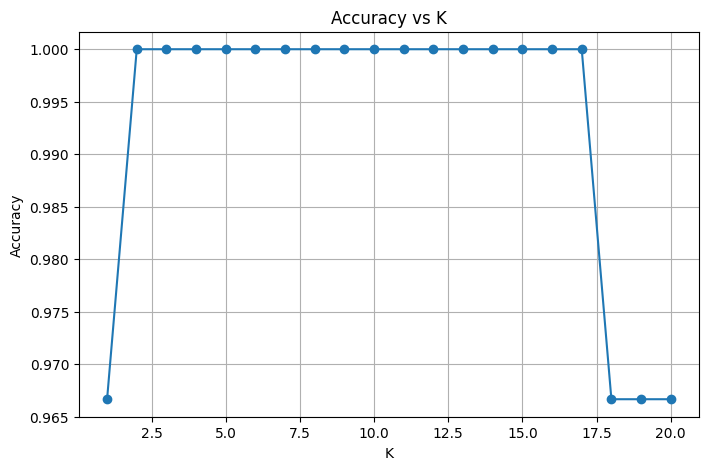

In [8]:
# Plot accuracy vs K
plt.figure(figsize=(8, 5))
plt.plot(k_range, accuracies, marker='o')
plt.title("Accuracy vs K")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


In [9]:
# Use best K
best_k = k_range[np.argmax(accuracies)]
print(f"Best K: {best_k}")

Best K: 2


In [10]:
# Train final model
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

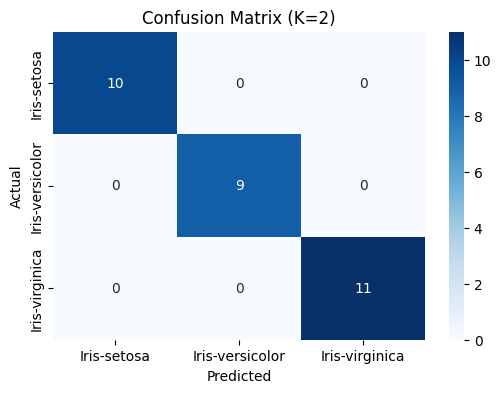

In [11]:

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.title(f'Confusion Matrix (K={best_k})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [12]:
# PCA for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)


In [13]:
# Train/test split on PCA data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42)

knn_pca = KNeighborsClassifier(n_neighbors=best_k)
knn_pca.fit(X_train_pca, y_train_pca)


KNeighborsClassifier(n_neighbors=2)

In [14]:
# Meshgrid for decision boundary
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

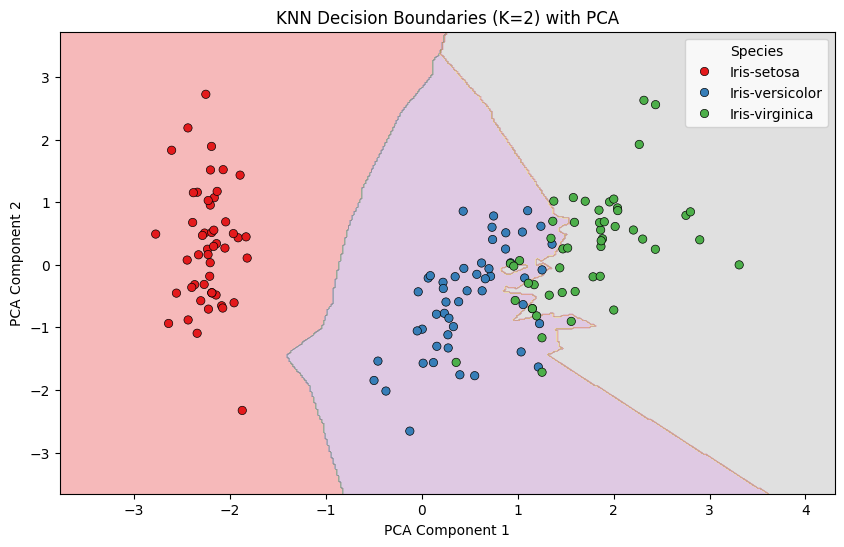

In [16]:
# Plot decision boundary
plt.figure(figsize=(10, 6))

# Map string labels to integers for contourf
label_map = {label: idx for idx, label in enumerate(np.unique(y))}
Z_numeric = np.array([label_map[label] for label in Z.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z_numeric, alpha=0.3, cmap='Set1')
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=y, palette='Set1', edgecolor='k')
plt.title(f"KNN Decision Boundaries (K={best_k}) with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()